In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import warnings
%matplotlib inline
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indic

In [2]:
df = pd.read_csv('iris-data.csv')
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


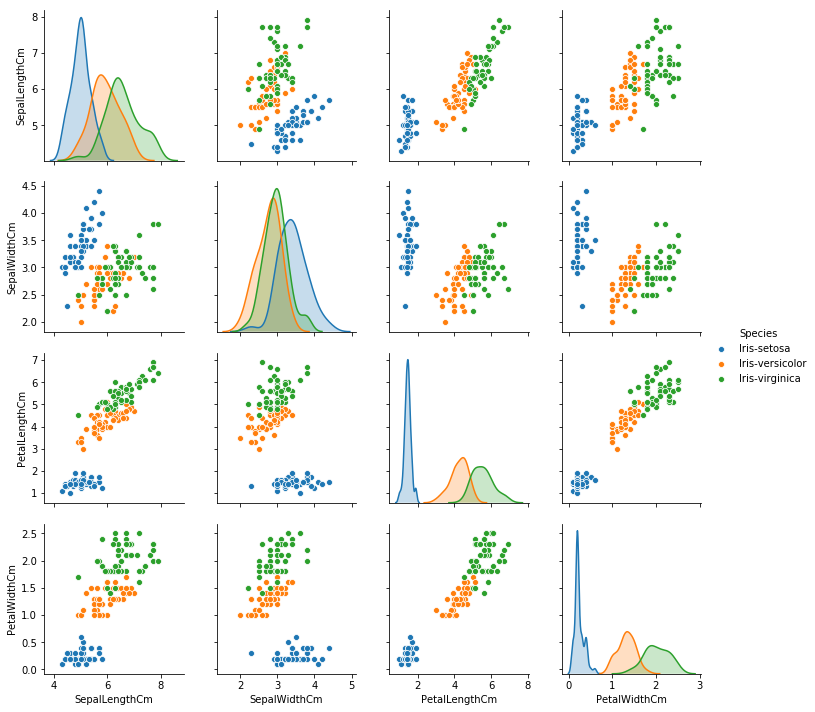

In [3]:
sb.pairplot(data=df, hue='Species')

In [4]:
df = df.loc[df.Species!='Iris-versicolor']

x = df[['SepalLengthCm', 'SepalWidthCm']].values
y = df['Species']

std = StandardScaler()
le = LabelEncoder()

x_std = std.fit_transform(x)
y = le.fit_transform(y)

print(x_std[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[-0.74103202  0.73432522]
 [-0.95366674 -0.47344653]
 [-1.16630147  0.00966217]
 [-1.27261883 -0.23189218]
 [-0.84734938  0.97587957]
 [-0.42207993  1.70054262]
 [-1.27261883  0.49277087]
 [-0.84734938  0.49277087]
 [-1.48525356 -0.71500088]
 [-0.95366674 -0.23189218]]
[0 0 0 0 0 0 0 0 0 0]


In [5]:
def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
#     x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1,xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [6]:
def plot_svc_decision_function(model,ax=None,plot_support=True):
    
    if ax is None:
        ax=plt.gca()
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()
        
    x=np.linspace(xlim[0],xlim[1],30)
    y=np.linspace(ylim[0],ylim[1],30)
    Y,X=np.meshgrid(y,x)
    xy=np.vstack([X.ravel(),Y.ravel()]).T
    P=model.decision_function(xy).reshape(X.shape)
    #plot decision boundaries and margins
    ax.contour(X,Y,P,colors='k',levels=[-1,0,1],alpha=0.5,linestyles=['--','-','--'])
    
    #plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,-1],
                   s=300,linewidth=1,facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [7]:
from sklearn.svm import SVC
from sklearn.svm import SVR

c = np.array([0.01, 1.0, 100])
gamma = np.array([0.01, 1.0, 100])

/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Accuracy: 1.000


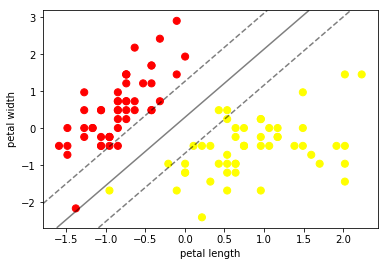

CPU times: user 417 ms, sys: 97.1 ms, total: 514 ms
Wall time: 187 ms


In [8]:
%%time
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
# print(dir(svm))
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x_std[:,0],x_std[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

In [9]:
# %%time
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.01,0.000848,0.000379,0.969697,0.97,3
1,1,0.000327,0.000217,0.994949,0.98,1
2,100,0.000337,0.000222,1.000000,0.98,1


Accuracy: 0.967


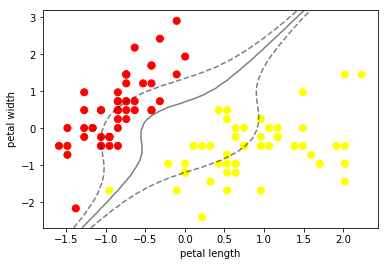

CPU times: user 450 ms, sys: 94.4 ms, total: 544 ms
Wall time: 216 ms


In [10]:
%%time
svm = SVC(kernel='poly')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x_std[:,0],x_std[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [11]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.01,0.01,0.000660,0.000376,0.599822,0.59,7
1,0.01,1,0.000413,0.000266,0.939840,0.88,6
2,0.01,100,0.000322,0.000207,1.000000,0.99,1
3,1,0.01,0.000338,0.000229,0.599822,0.59,7
4,1,1,0.000329,0.000209,1.000000,0.96,5
5,1,100,0.000289,0.000209,1.000000,0.99,1
6,100,0.01,0.000348,0.000261,0.599822,0.59,7
7,100,1,0.000283,0.000213,1.000000,0.99,1
8,100,100,0.000293,0.000215,1.000000,0.99,1


Accuracy: 0.967


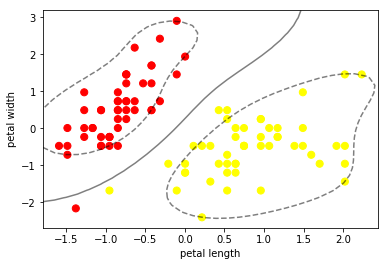

CPU times: user 395 ms, sys: 81.1 ms, total: 476 ms
Wall time: 170 ms


In [12]:
%%time
svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x_std[:,0],x_std[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [13]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.01,0.01,0.000858,0.000365,0.954843,0.96,6
1,0.01,1,0.000409,0.000242,0.989899,0.99,1
2,0.01,100,0.000418,0.000255,1.000000,0.74,9
3,1,0.01,0.000374,0.000235,0.990048,0.99,1
4,1,1,0.000321,0.000235,1.000000,0.98,3
5,1,100,0.000557,0.000251,1.000000,0.81,7
6,100,0.01,0.000296,0.000210,0.994949,0.98,3
7,100,1,0.000341,0.000217,1.000000,0.98,3
8,100,100,0.000512,0.000283,1.000000,0.81,7


Accuracy: 0.967


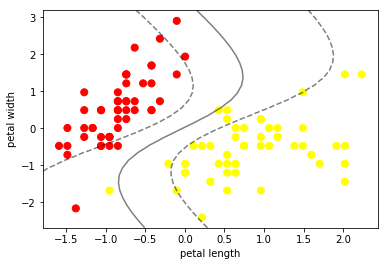

In [14]:
svm = SVC(kernel='sigmoid')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

plt.scatter(x_std[:,0],x_std[:,1],c=y,s=50,cmap='autumn')
plot_svc_decision_function(svm)
plt.xlabel('petal length')
plt.ylabel('petal width')   
plt.show()

In [15]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.01,0.01,0.000744,0.000487,0.954843,0.96,6
1,0.01,1,0.000423,0.000285,0.994949,0.97,4
2,0.01,100,0.000381,0.000242,0.994949,0.99,1
3,1,0.01,0.000610,0.000361,0.969697,0.97,4
4,1,1,0.000482,0.000310,0.965092,0.96,6
5,1,100,0.000314,0.000225,0.910576,0.86,9
6,100,0.01,0.000356,0.000224,0.994949,0.98,2
7,100,1,0.000333,0.000232,0.974896,0.98,2
8,100,100,0.000341,0.000260,0.945781,0.93,8


In [16]:
corrmatrix = df.corr()
corrmatrix.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.206766,0.904796,0.853251
SepalWidthCm,-0.206766,1.000000,-0.478845,-0.445980
PetalLengthCm,0.904796,-0.478845,1.000000,0.969650
PetalWidthCm,0.853251,-0.445980,0.969650,1.000000


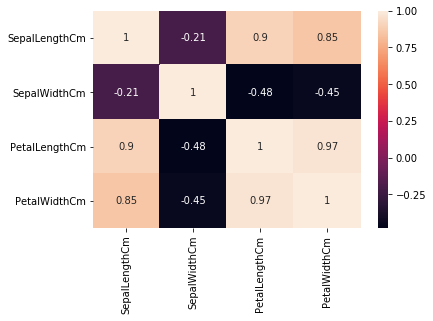

In [17]:
sb.heatmap(corrmatrix, annot=True)

In [18]:
x = df[['PetalLengthCm']].values
y = df['PetalWidthCm'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
x_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size=0.3)

In [19]:
%%time
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
print('Score: %.3f' % svm.score(x_test, y_test))

Score: 0.940
CPU times: user 2.82 ms, sys: 1.36 ms, total: 4.18 ms
Wall time: 1.23 ms


In [20]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.01,0.000684,0.000560,0.591787,-40.639264,3
1,1,0.000355,0.000305,0.927058,0.133214,1
2,100,0.002589,0.000366,0.926792,0.133069,2


In [21]:
%%time
svm = SVR(kernel='poly')
svm.fit(x_train, y_train)
print('Score: %.3f' % svm.score(x_test, y_test))

Score: 0.674
CPU times: user 4.64 ms, sys: 2.3 ms, total: 6.94 ms
Wall time: 2.66 ms


In [22]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.01,0.01,0.000504,0.000379,-0.261523,-104.454422,8
1,0.01,1,0.000283,0.000266,0.444793,-58.809723,5
2,0.01,100,0.503084,0.000402,0.644164,-6.156762,2
3,1,0.01,0.000271,0.000238,-0.261359,-104.442283,7
4,1,1,0.000474,0.000247,0.644606,-6.271862,4
5,1,100,30.600427,0.000417,0.519169,-4.322003,1
6,100,0.01,0.000260,0.000231,-0.246182,-103.615212,6
7,100,1,0.005406,0.000258,0.644595,-6.271297,3
8,100,100,27.289144,0.000394,-2341.540559,-11181.104925,9


In [23]:
%%time
svm = SVR(kernel='rbf')
svm.fit(x_train, y_train)
print('Score: %.3f' % svm.score(x_test, y_test))

Score: 0.960
CPU times: user 1.32 ms, sys: 669 µs, total: 1.98 ms
Wall time: 1.27 ms


In [24]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.01,0.01,0.000452,0.000402,-0.235964,-102.916465,9
1,0.01,1,0.000306,0.000262,0.254112,-71.121380,7
2,0.01,100,0.000299,0.000258,-0.026186,-90.807661,8
3,1,0.01,0.000308,0.000264,0.838549,-10.914952,6
4,1,1,0.000287,0.000265,0.943438,0.262916,2
5,1,100,0.000379,0.000257,0.954326,-1.998313,5
6,100,0.01,0.000675,0.000590,0.938766,0.101036,3
7,100,1,0.001727,0.000554,0.945356,0.283994,1
8,100,100,0.001065,0.000345,0.957464,-1.643818,4


In [25]:
%%time
svm = SVR(kernel='sigmoid')
svm.fit(x_train, y_train)
# print(dir(svm))
print('Score: %.3f' % svm.score(x_test, y_test))

Score: 0.599
CPU times: user 1.8 ms, sys: 984 µs, total: 2.79 ms
Wall time: 1.59 ms


In [26]:
grid = GridSearchCV(estimator=svm, param_grid=dict(C=c, gamma=gamma))
grid.fit(x_std, y)
grid_data = pd.DataFrame(grid.cv_results_)[['param_C', 'param_gamma', 'mean_fit_time', 'mean_score_time', 'mean_train_score', 'mean_test_score', 'rank_test_score']]
grid_data.head(10)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,param_C,param_gamma,mean_fit_time,mean_score_time,mean_train_score,mean_test_score,rank_test_score
0,0.01,0.01,0.000689,0.000512,-0.248424,-103.667833,8
1,0.01,1,0.000347,0.000280,0.470921,-53.179860,7
2,0.01,100,0.000304,0.000259,0.603096,-38.838486,5
3,1,0.01,0.000269,0.000245,0.591767,-40.641461,6
4,1,1,0.000349,0.000283,0.265253,-6.241404,4
5,1,100,0.000272,0.000261,0.935957,0.208505,2
6,100,0.01,0.000419,0.000415,0.926999,0.132925,3
7,100,1,0.000450,0.000354,-8044.466597,-80436.227884,9
8,100,100,0.000305,0.000285,0.935957,0.208505,1


In [27]:
x = df.iloc[:, :-1]
y = df['Species'].values

sc = StandardScaler()
x_std = sc.fit_transform(x)

le = LabelEncoder()
y = le.fit_transform(y)

print(x_std[:10])
print(y[:10])

x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=0.3)

[[-0.74103202  0.73432522 -1.01164677 -1.02231593]
 [-0.95366674 -0.47344653 -1.01164677 -1.02231593]
 [-1.16630147  0.00966217 -1.0596376  -1.02231593]
 [-1.27261883 -0.23189218 -0.96365593 -1.02231593]
 [-0.84734938  0.97587957 -1.01164677 -1.02231593]
 [-0.42207993  1.70054262 -0.86767427 -0.80363873]
 [-1.27261883  0.49277087 -1.01164677 -0.91297733]
 [-0.84734938  0.49277087 -0.96365593 -1.02231593]
 [-1.48525356 -0.71500088 -1.01164677 -1.02231593]
 [-0.95366674 -0.23189218 -0.96365593 -1.13165453]]
[0 0 0 0 0 0 0 0 0 0]


In [28]:
%%time
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
print('Accuracy: %.3f' % svm.score(x_test, y_test))

Accuracy: 1.000
CPU times: user 1.84 ms, sys: 1.33 ms, total: 3.17 ms
Wall time: 2.06 ms


In [29]:
%%time
svm = SVR(kernel='linear')
svm.fit(x_train, y_train)
print('Score: %.3f' % svm.score(x_test, y_test))

Score: 0.975
CPU times: user 1.72 ms, sys: 1.04 ms, total: 2.76 ms
Wall time: 1.61 ms
